In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.graphics.tsaplots import plot_acf

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Dropout
from keras import Input

import math

In [336]:
df = pd.read_csv('df_nivel_rios.csv')
df = df.iloc[:, 1:]

# Converter 'Data' para datetime
df['Data'] = pd.to_datetime(df['Data'])

df = df.set_index('Data')
df = df[['Nível Guaíba (cm)']]

In [337]:

split_ratio = 0.75
split_index = int(len(df) * split_ratio)

train = df[:split_index]
test = df[split_index:]

scaler = MinMaxScaler()
scaler.fit(train)
train_data = scaler.transform(train)
test_data = scaler.transform(test)

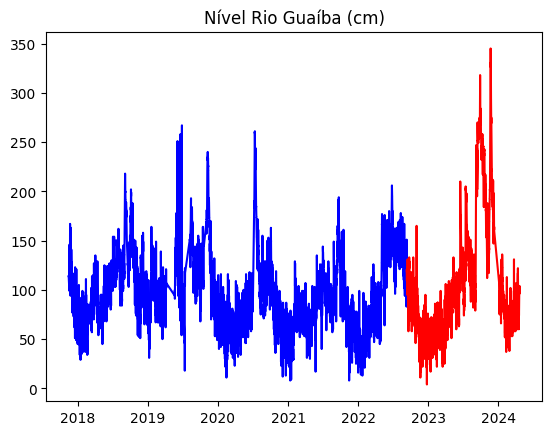

In [338]:
plt.plot(train, color='blue', label='Histórico de treinamento')
plt.plot(test, color='red', label='Histórico de teste')
plt.title('Nível Rio Guaíba (cm)')
plt.show()

In [339]:
# Define sequence length
length = 48    # 1 semana (24h * 7 dias)

batch_size = 1
# 1 beacause it's univariate
n_features = 1

generator = TimeseriesGenerator(train_data, train_data, stride=1, length=length, batch_size=batch_size)

In [340]:
model = Sequential()
#model.add(LSTM(32, return_sequences=True, input_shape=(length, n_features)))
#model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True, input_shape=(length, n_features)))
model.add(Dropout(0.2))
#model.add(LSTM(64, return_sequences=True, input_shape=(length, n_features)))
#model.add(Dropout(0.2))
#model.add(LSTM(32, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss="mse")

c:\Users\claud\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [341]:
model.summary()

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_76 (LSTM)                  │ (None, 48, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 48, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 48, 1)          │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

In [342]:
model.fit(generator, epochs=5, verbose=1)

Epoch 1/5
   12/42226 ━━━━━━━━━━━━━━━━━━━━ 7:01 10ms/step - loss: 0.1429

c:\Users\claud\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42226/42226 ━━━━━━━━━━━━━━━━━━━━ 458s 11ms/step - loss: 0.0045
Epoch 2/5
42226/42226 ━━━━━━━━━━━━━━━━━━━━ 455s 11ms/step - loss: 0.0034
Epoch 3/5
42226/42226 ━━━━━━━━━━━━━━━━━━━━ 561s 13ms/step - loss: 0.0034
Epoch 4/5
42226/42226 ━━━━━━━━━━━━━━━━━━━━ 299s 7ms/step - loss: 0.0034
Epoch 5/5
42226/42226 ━━━━━━━━━━━━━━━━━━━━ 295s 7ms/step - loss: 0.0034


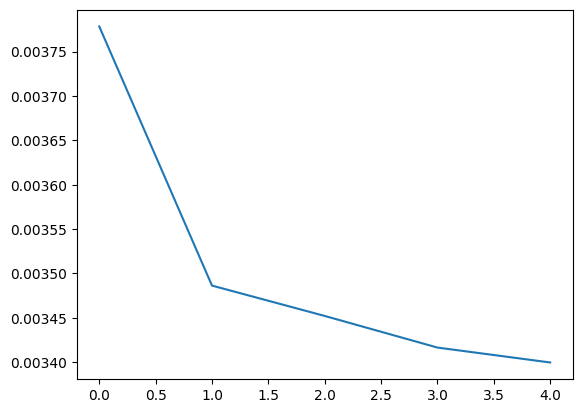

In [343]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [344]:
test_predictions = []

first_eval_batch = train_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

#for i in range(len(test_data)):
for i in range(500):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    print(current_pred)
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
[[0.32928285]
 [0.31498712]
 [0.30674845]
 [0.307204  ]
 [0.29641348]
 [0.29296088]
 [0.28981718]
 [0.2883333 ]
 [0.2947955 ]
 [0.3056658 ]
 [0.3192541 ]
 [0.30534992]
 [0.29658026]
 [0.30617082]
 [0.32491162]
 [0.3366035 ]
 [0.33943966]
 [0.3331583 ]
 [0.32402438]
 [0.34206045]
 [0.35615787]
 [0.4077307 ]
 [0.43249565]
 [0.44578788]
 [0.46070328]
 [0.45824704]
 [0.4627509 ]
 [0.49006546]
 [0.51598185]
 [0.51130146]
 [0.5082908 ]
 [0.502999  ]
 [0.49761432]
 [0.49204582]
 [0.49052966]
 [0.4734109 ]
 [0.45338082]
 [0.43858898]
 [0.42617628]
 [0.41441184]
 [0.40723112]
 [0.40541494]
 [0.39937055]
 [0.4005494 ]
 [0.41454196]
 [0.4232772 ]
 [0.43953872]
 [0.4359952 ]]


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 4 dimension(s)

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
test_df = df.iloc[len(train_data):len(train_data)+500]
test_df['Predictions'] = true_predictions

C:\Users\claud\AppData\Local\Temp\ipykernel_2136\595138850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Predictions'] = true_predictions


In [ ]:
train_predictions = []

first_eval_batch = test_data[:length]
current_batch = first_eval_batch.reshape((1, length, n_features))

#for i in range(len(test_data)):
for i in range(500):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    print(current_pred)
    
    # append the prediction into the array
    train_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[0.3635044]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[0.36727604]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0.3721911]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[0.37824616]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[0.38460115]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0.39101893]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[0.3975169]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[0.40398473]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[0.41026005]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[0.4162895]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[0.42203534]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[0.42736766]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[0.43228093]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[0.4367498]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[0.44074258]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[0.44427282]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[0.44736043]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[0.45002216]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[0.45229506]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/ste

In [ ]:
true_predictions_train = scaler.inverse_transform(train_predictions)
train_df = df.iloc[:500]
train_df['Predictions'] = true_predictions_train

C:\Users\claud\AppData\Local\Temp\ipykernel_2136\756884027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Predictions'] = true_predictions_train


<Axes: xlabel='Data'>

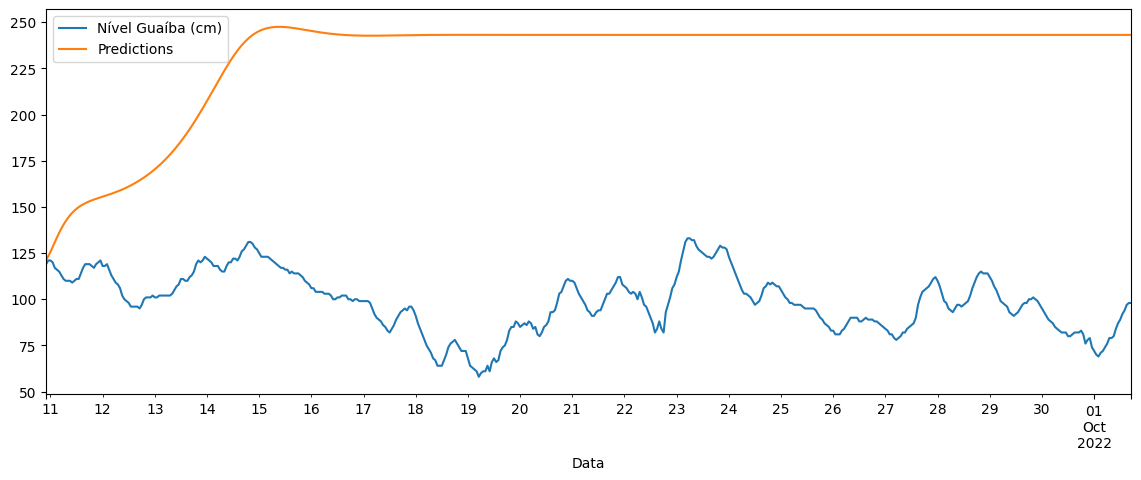

In [ ]:
test_df.iloc[0:1000].plot(figsize=(14,5))

<Axes: xlabel='Data'>

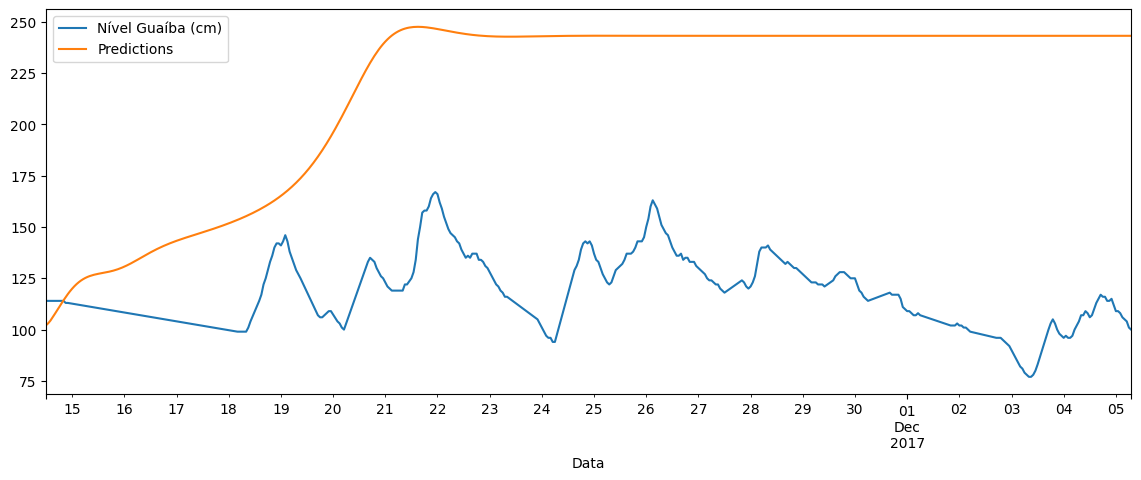

In [ ]:
train_df.iloc[0:1000].plot(figsize=(14,5))

In [ ]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 168    # 1 semana (antes foi tentado 1 mes)

# Create sequences for training set
X_train, y_train = create_sequences(train_data, seq_length)

# Create sequences for testing set
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape input data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

trainScore = model.evaluate(X_train, y_train, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(X_test, y_test, verbose=1)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

1316/1316 ━━━━━━━━━━━━━━━━━━━━ 42s 31ms/step - loss: 9.1480e-05
Train Score: 0.00 MSE (0.01 RMSE)
436/436 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - loss: 1.2656e-04
Test Score: 0.00 MSE (0.02 RMSE)
